In [16]:
import numpy as np
from keras.datasets import imdb

In [17]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000) # only first 10000 relevant words will be considered

In [18]:
len(XT)

25000

In [19]:
print(XT[0])  # keras autumatically convert words to vector no extra processing is needed

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [20]:
word_idx = imdb.get_word_index()
idx_word = dict([value,key] for (key,value) in word_idx.items())  #swap key values

In [21]:
# Vectorize the data
# since vocab size is 10000 so we want every word to be represnt as vector of len 10000 (0 and 1 collection)
# if word is there 1 else 0

In [24]:
def vectorize_sentence(sentences,dim=10000):
    outputs = np.zeros((len(sentences),dim)) # setence is a list of number
    for (i,idx) in enumerate(sentences):
        # enumerate return index and sentence which is a number array
        outputs[i,idx]=1;
    return outputs
    

In [25]:
X_train = vectorize_sentence(XT)
X_test = vectorize_sentence(Xt)

In [26]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

In [29]:
# Building a network
# RelU Activation
# 2 hidden layer with 16 units
# 1 o/p layer with 1 unit (Sigmoid activation)

In [30]:
from keras import models
from keras.layers import Dense

In [34]:
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,))) # first layer we have to tell the model and in next it will automatially 
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Training and Validation - Avoiding overfitting (by early stopping)
# validation set we see accuracy of training set and find max accuracy and is useful to get point where max accuracy came
# training acc inc but validatiion start decreasing after certain pt due to overfitting

In [42]:
x_val = X_train[:5000]
x_train = X_train[5000:]
y_val = Y_train[:5000]
y_train = Y_train[5000:]

In [43]:
hist = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))  #btch size power of 2 like large db so small batch size works

Epoch 1/20
40/40 [==============================] - 4s 91ms/step - loss: 0.4773 - accuracy: 0.8140 - val_loss: 0.3702 - val_accuracy: 0.8606
Epoch 2/20
40/40 [==============================] - 1s 32ms/step - loss: 0.2790 - accuracy: 0.9072 - val_loss: 0.2929 - val_accuracy: 0.8858
Epoch 3/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2062 - accuracy: 0.9310 - val_loss: 0.2753 - val_accuracy: 0.8888
Epoch 4/20
40/40 [==============================] - 1s 32ms/step - loss: 0.1658 - accuracy: 0.9442 - val_loss: 0.2712 - val_accuracy: 0.8922
Epoch 5/20
40/40 [==============================] - 1s 31ms/step - loss: 0.1354 - accuracy: 0.9550 - val_loss: 0.3427 - val_accuracy: 0.8704
Epoch 6/20
40/40 [==============================] - 1s 27ms/step - loss: 0.1134 - accuracy: 0.9639 - val_loss: 0.3110 - val_accuracy: 0.8838
Epoch 7/20
40/40 [==============================] - 1s 27ms/step - loss: 0.0955 - accuracy: 0.9684 - val_loss: 0.3177 - val_accuracy: 0.8850
Epoch 8/20
40

In [44]:
import matplotlib.pyplot as plt

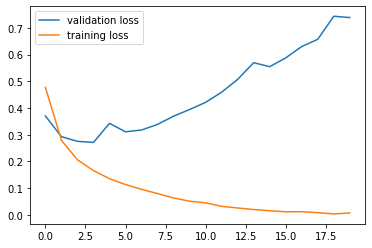

In [47]:
h=hist.history
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label="training loss")
plt.legend()
plt.show()


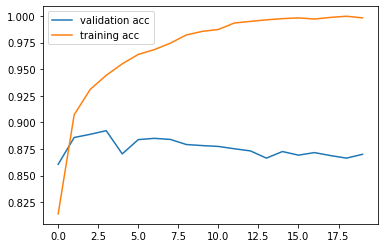

In [48]:
plt.plot(h['val_accuracy'],label="validation acc")
plt.plot(h['accuracy'],label="training acc")
plt.legend()
plt.show()

In [50]:
# we can oberser round 4 epochs acc is max so we can retrain using 4 epochs
model.predict(X_test)

array([[0.00483793],
       [1.        ],
       [0.6060647 ],
       ...,
       [0.01265809],
       [0.00650394],
       [0.8114209 ]], dtype=float32)